## 3장. 데이터 전처리 및 기초분석

### 3.1 분석을 위한 데이터 준비

#### 1. 데이터 불러오기

실습데이터 Ashopping을 파이썬을 이용하여 불러온다. 


#### 변수명=pd.read_csv("파일경로\파일이름\.파일형식", sep="구분자", encoding='코딩방식')

    구분자: ",",  "|", "\s+"
    encoding:'CP949' 파이썬에서 한글을 열수 있도록 인코딩 설정


In [ ]:
# 텍스트 파일 열기
import pandas as pd
df = pd.read_csv("C:\python\Ashopping.txt",sep=",", encoding='CP949')
df

In [ ]:
df.info() #데이터 칼럼 정보 확인

### 3.2 데이터 전처리 및 파생변수 생성

### 1. 데이터 전처리

#### 1) 표본추출하기

무작위 표본추출을 실행해 본다.

#### dataframe.sample(n=None,replace=False, random_state=None)
     
     n:출력될 표본의 크기
     replace:복원추출 여부(True/False)
     random_state:임의난수

In [ ]:
data_temp = df.sample(n=10, replace= False, random_state=123)
data_temp

#### 2) 조건을 만족하는 레코드 추출하기

고객의 이탈여부가 '1', 즉 이탈로 판단된 고객만을 추출하는 작업을 진행해 본다. 

In [ ]:
churn_customer = df[df.이탈여부==1] 

In [ ]:
churn_customer.head()

#### 3) 특정 필드 추출하기

'고객ID','방문빈도' 컬럼만 추출하는 필드 추출 작업을 진행한다. 

In [ ]:
df_1= df[["고객ID","방문빈도"]] #컴럼명을 입력하여 추출하기

In [ ]:
df_1.head()

#### 4) 데이터 분할하기

'고객ID'를 기준으로 고객ID가 500 이하와 500초과의 두 고객군으로 분할하는 실습을 진행한다.

In [ ]:
Under_500 = df[df.고객ID<=500] 
Upper_500 = df[df.고객ID>500] 

In [ ]:
Under_500.tail()

In [ ]:
Upper_500.tail()

#### 5) 데이터 추가하기

'고객ID 1~500' 데이터 셋에 '501~1000'데이터 셋을 다시 추가해 본다.

   #### dataframe1.append(dataframe2, ignore_index=True/False)
    
    ignore_index: 데이터 통합 후 index 유지여부 선택 

In [ ]:
df_join=Under_500.append(Upper_500,ignore_index=True)
df_join

#### 6) 데이터 병합하기

'고객ID'와 '방문빈도'만을 선택한 데이터 셋에 '고객ID'를 기준으로 '총 매출액' 변수를 추가한 데이터 셋을 만든다. 

- index가 같은 경우 병합하기

#### dataframe_data1.join(dataframe_data2)

In [ ]:
df_2 = df[["총_매출액"]]

In [ ]:
df_join = df_1.join(df_2)
df_join

- 특정 열 기준 병합하기

#### datafarme_left_data.merge(dataframe_right_data, how=left/right/outer/inner, on=key_label)
    
    on: key로 사용하고자하는 열 입력
    - how 선택 인자 -

    left: 왼쪽 데이터는 유지하고 지정된 열값이 있는 오른쪽 데이터 선택
    
    right: 오는쪽 데이터는 모두 유지하고 지정된 열에 값이 있는 왼쪽 데이터 선택
    
    outter: 지정된 열을 기준으로 왼쪽과 오른쪽 데이터 모두 선택
    
    inner: 지정된 열을 기준으로 왼쪽과 오른쪽 데이터 중 공통 항목만 선택

In [ ]:
df_3 = df[["고객ID","총_매출액"]]

In [ ]:
df_merge = df_1.merge(df_3)
df_merge.head()

### 2. 파생변수의 생성

#### 1) 표현형태 변환하기

성별 변수에 대한 0/1 코딩방식을 보다 직관적인 형태인 남/여 형태로 전환해본다. 


#### np.where(조건, 만족하는 경우, 만족하지않는 경우)

In [ ]:
import numpy as np
df['남여']=np.where(df.성별 == 0, "남자","여자")

In [ ]:
df.성별

In [ ]:
df['남여']

In [ ]:
df.남여.value_counts()

### 2) 척도 변환하기
고객들의 총 매출액을 기준으로 상, 중, 하로 표현되는 고객등급 변수를 만들어 본다.

In [ ]:
df['New고객등급'] = np.where(df.총_매출액 >=100000,"3",np.where(df.총_매출액>=1000,"2","1"))

In [ ]:
df

In [ ]:
df.New고객등급.value_counts()

### 3) 모델링을 활용해 파생변수 생성하기

고객들의 방문빈도와 총 매출액 변수를 활용해 만들어진 고객들의 1회 평균매출액이라는 파생변수를 직접 만들어 본다. 

In [ ]:
df["New_1회_평균매출액"]=df["총_매출액"]/df["방문빈도"]

In [ ]:
df

### 4) 거래이력 요약을 통한 파생변수 생성하기

고객들의 거래데이터가 아닌 고객데이터이기 때문에 고객들의 '이탈여부에 따른 총 매출액의 합계'라는 파생변수를 생성한다. 

In [ ]:
sum(churn_customer.총_매출액) #이탈 고객의 총 매출액

In [ ]:
Non_churn_customer = df[df.이탈여부==0] 

In [ ]:
sum(Non_churn_customer.총_매출액)

## 3.3 유용한 통계 그래프

### 1. 히스토그램

A 쇼핑에서는 고객만족경영의 일환으로 매년 고객들의 서비스 만족도를 조사하여 개선해야 할 문제점을 찾아 해결해 나가고 있다. 그런데 올해는 지난해와 달리 전반적인 서비스 만족도가 다소 떨어졌다는 마케팅 조사팀의 보고를 받고 올해 시행한 고객 서비스 만족도의 평가 현황을 파악해 보고자 한다. 

In [1]:
import pandas as pd
df = pd.read_csv("C:\python\Ashopping.txt",sep=",", encoding='CP949')#enconding: 인코딩 방식 설정
df.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용_횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성,D1,D2,D3
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,6,6,6,6,6,6,0,0,1
1,2,1,3168400,14,226314,22,350995,2,4,0,...,6,6,5,3,6,6,6,0,0,1
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,7,7,6,6,7,0,0,1
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,6,6,6,5,6,0,0,1
4,5,0,13745950,73,188301,9,246350,1,2,0,...,6,5,5,6,6,5,6,1,0,0


#### matplotlib 
- python에서 데이터 시각화를 위해 가장 많이 사용하는 라이브러리
- 2차원 그래프를 그릴 때 높은 수준의 결과물을 보장한다.
- 사용자의 기호에 따라 그래프의 스타일, 각 축의 특성, 폰트의 특성등을 설정할 수 있다. 
    
#### plt.hist(x, bins=n/auto)
    - bins: 계급의 개수, auto로 설정하면 자동으로 계급을 생성해준다. 
    - rwidth: bar사이 간격설정
    - color: bar 색 설정
    - alpha : 그래프의 투명도 조절
    - lable: 변수의 범례에 들어갈 텍스트 입력
    - legend():변수의 범례를 나타냄
    - grid(): 도표에 모눈을 표시함
    

In [3]:
import matplotlib #한글깨짐현상 방지
matplotlib.rcParams['font.family'] = 'Malgun Gothic'   # '맑은 고딕'으로 설정 
matplotlib.rcParams['axes.unicode_minus'] = False

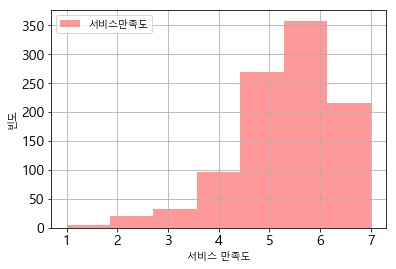

In [4]:
#히스토그램
%matplotlib inline
import matplotlib.pyplot as plt 
plt.hist(df['서비스_만족도'],alpha=0.4, bins=7, rwidth=1, color ='red', label='서비스만족도')
plt.legend()
plt.grid()
plt.xlabel("서비스 만족도")
plt.ylabel('빈도')
plt.xticks(fontsize = 14)#글씨 크기설정
plt.yticks(fontsize = 14)#글씨 크기설정
plt.show()

#### 결과 해석

- 히스토그램 결과 서비스만족도는 5점, 6점, 7점에 대부분 분포
- 상대적으로 만족도의 점수를 낮게 평가한 고객들의 빈도 수가 낮음
- A 쇼핑의 서비스만족도는 대체로 높게 평가되었다고 할 수 있으나, 낮은 만족도를 나타낸 소수의 고객들에 대한 불만족 원인을 파악하여 개선점을 찾는 것이 필요

In [6]:
df.서비스_만족도.value_counts()

6    358
5    270
7    216
4     97
3     33
2     21
1      5
Name: 서비스_만족도, dtype: int64

### 2. 산점도

고객들의 총 매출액을 높이기 위해 프로모션을 진행하고자 한다. 만약 방문빈도가 높은 고객들의 총 매출액이 대체적으로 높게 나타난다면 무엇보다 고객들의 방문을 유도하는 데 초점을 맞춘 마케팅 전략을 수행해야 할 것이다. 이를 위해 산점도를 활용한 두 변수 간의 관계를 살펴보도록 한다.

In [3]:
import matplotlib.pyplot as plt

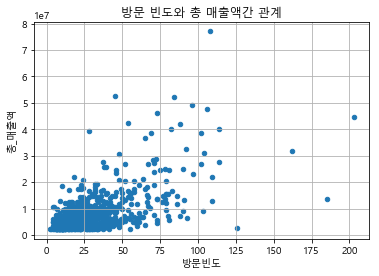

In [4]:
df.plot.scatter(x='방문빈도',y='총_매출액', grid=True, title='방문 빈도와 총 매출액간 관계')

#### 결과 해석 
- 방문빈도와 총 매출액 사이에는 어느 정도 상관관계가 있는 것으로 파악
- 특히 누적 방문빈도 50회 전후에서는 방문빈도에 따라 매출액의 증가가 비교적 명확
- 50회 이상부터는 매출액의 편차가 대단히 큰 것으로 나타남.
- 이 기업의 경우 우량고객이 되기 전까지는 매장방문을 유도하는 전략을, 우량고객이 된 이후에는 방문당 구매액을 증대시키는 전략을 수행하는 것이 바람직

### 3. 파이차트

#### 실습
A 쇼핑은 파이차트를 활용하여 전체 고객 중 각각의 구매유형별 고객분포를 확인한다. 

In [7]:
groupby_구매유형 = df.groupby('구매유형')
groupby_구매유형.describe()

#groupby : '데이터셋'.groupby('그룹핑할 변수') : 데이터 셋 내에 그룹핑할 변수를 선택하여 무리 지음

1회_평균매출액                                                              \
        count           mean            std       min       25%       50%   
구매유형                                                                        
1        43.0  350206.418605   87347.322958  178490.0  273910.5  364625.0   
2       317.0  204790.258675  102578.238195   22461.0  118862.0  193454.0   
3       144.0  736705.520833  311538.495595  502599.0  553479.0  630736.5   
4       496.0  264714.028226  100920.480202   78284.0  186106.5  248438.5   

                               D1      ...  할인권_사용_횟수       할인민감여부            \
            75%        max  count mean ...        75%   max  count      mean   
구매유형                                   ...                                     
1     414084.50   489752.0   43.0  0.0 ...       26.0  30.0   43.0  0.186047   
2     268759.00   496672.0  317.0  1.0 ...       23.0  30.0  317.0  0.059937   
3     786918.00  2680100.0  144.0  0.0 ...       24.0  30.0  144.0  0.118056   
4     344615.25   499499.0  496.0  0.0 ...       22.0  30.0  496.0  0.064516   

                                         
           std  min  25%  50%  75%  max  
구매유형                                     
1     0.393750  0.0  0.0  0.0  0.0  1.0  
2     0.237745  0.0  0.0  0.0  0.0  1.0  
3     0.323800  0.0  0.0  0.0  0.0  1.0  
4     0.245918  0.0  0.0  0.0  0.0  1.0  

[4 rows x 312 columns]

<function matplotlib.pyplot.show>

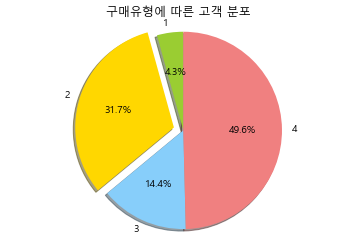

In [8]:
labels = ['1','2','3','4'] #라벨 지정
sizes = [43, 317, 144, 496] # 크기 지정
colors = ['yellowgreen','gold','lightskyblue','lightcoral'] #색 지정
explode = (0, 0.1, 0, 0)
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct='%1.1f%%',shadow = True, startangle = 90)
plt.axis('equal')
plt.title('구매유형에 따른 고객 분포')
plt.show

In [9]:
df.구매유형.value_counts()

4    496
2    317
3    144
1     43
Name: 구매유형, dtype: int64

#### 결과 해석
- A 쇼핑 데이터에서 구매유형에 따른 고객 분포는 4 > 2 > 3 > 1 순으로 많음.
- 각 고객 유형들의 특징을 분석하여 차후에 고객 세분화 과정에서 사용할 수 있다.

### 4. 상자그림

#### seaborn
- 파이썬에서 통계 그래프와 그림을 만드는 과정을 단순하게 해주는 패키지
- matplotlib 기반으로 만들어져 numpy와 pandas의 자료구조를 지원한다. 
- 히스토그램, 밀도 그래프, 막대 그래프, 상자그림, 산점도 등 기본 통계 그래프 만드는 기능 제공
- 테마와 색상 팔레트가 내장되어 있어 꾸미기가 좋다.

쇼핑은 고객들에게 제공하는 할인쿠폰이 실제로 성별에 따라 얼마나 활용되는지 파악해 보고자 한다. 성별에 따른 할인금액 수준이 다르다면 고객성별에 따른 차등적인 할인쿠폰 제공도 고려해 볼 수 있다.

#### seaborn.boxplot(x=None, y=None, hue=None, data=None)
    x: x축에 들어갈 데이터
    y: y축에 들어갈 데이터
    hue: 카테고리 변수 이름을 입력하여 카테고리 별 결과 출력

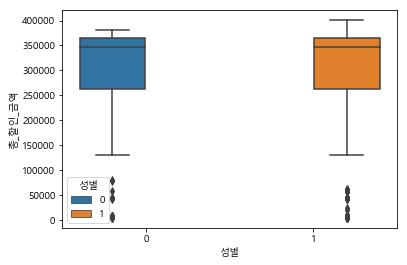

In [5]:
import seaborn as sns
# Box plots
sns.boxplot(x="성별", y="총_할인_금액", hue="성별", data=df)
plt.show()

#### 결과 해석
- 성별에 따른 할인금액 수준을 비교해 여성이 남성보다 최대 할인금액이 높은 것으로 나타나지만, 최소값, 평균, 그리고 제1사분위, 제2사분위, 제3사분위의 차이가 크지 않은 것 확인
- 성별에 따라 할인쿠폰 사용 수준이 크게 다르다고 볼 수 없으므로 성별에 따른 할인쿠폰 제도 변화는 불필요해 보임.